In [467]:
import pandas as pd
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import numpy as np
import string
from nltk import ngrams
from collections import defaultdict
from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
import re
import pickle


import warnings
warnings.filterwarnings("ignore")

In [182]:
tweets = pd.read_csv("nlp-getting-started/train.csv")
tweets_test = pd.read_csv("nlp-getting-started/test.csv")

In [183]:
print(f"""There are {tweets.shape[0]} rows and {tweets.shape[1]} columns in our Training Dataset.
There are {tweets_test.shape[0]} rows and {tweets_test.shape[1]} columns in our Test Dataset.""")

There are 7613 rows and 5 columns in our Training Dataset.
There are 3263 rows and 4 columns in our Test Dataset.


In [184]:
# using .head() function to display the first 5 rows of the dataset on our dataframe variable 'df'
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [185]:
# Using .describe() method which is used to returns description of the data in the DataFrame
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [186]:
# Using .info method to prints the information or summary of the dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [187]:
#  It shows the shape of the both train and test dataset
print(tweets.shape)
print(tweets_test.shape)

(7613, 5)
(3263, 4)


In [188]:
# Display all the columns of both train and testing dataset
print(tweets.columns)
print(tweets_test.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Index(['id', 'keyword', 'location', 'text'], dtype='object')


In [189]:
for col in tweets.columns:
    print(f"{col} : {tweets[col].nunique()} unique values")

id : 7613 unique values
keyword : 221 unique values
location : 3341 unique values
text : 7503 unique values
target : 2 unique values


In [190]:
for col in tweets_test.columns:
    print(f"{col} : {tweets[col].nunique()} unique values")

id : 7613 unique values
keyword : 221 unique values
location : 3341 unique values
text : 7503 unique values


In [191]:
# check null values in train dataframe
tweets.isnull().values.any()

True

In [192]:
# check null values in test dataframe
tweets_test.isnull().values.any()

True

In [193]:
# It shows the sum of all null values in each column of training dataset
tweets.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [194]:
# It shows the sum of all null values in each column of testing dataset
tweets_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [195]:
#  Dropping the id column form both the training as well as testing dataset, because it is just a serial number 
# so it doesn't provide any valuable information
tweets.drop(columns=['id'],inplace=True)
tweets_test.drop(columns=['id'],inplace=True)

#printing the shape of dataframes
print(tweets.shape)
print(tweets_test.shape)

(7613, 4)
(3263, 3)


In [196]:
# Display's an int representing the number of elements in dataframe
print(tweets.size)

# Display's an int representing the number of elements in dataframe
print(tweets_test.size)

30452
9789


In [197]:
#As we are working on Classification problem so it has only 2 unique values
len(tweets['target'].unique())

2

In [198]:
#target variable
tweets_target = tweets['target'] # Using tweets_target to seprating the target variable form the independent variables

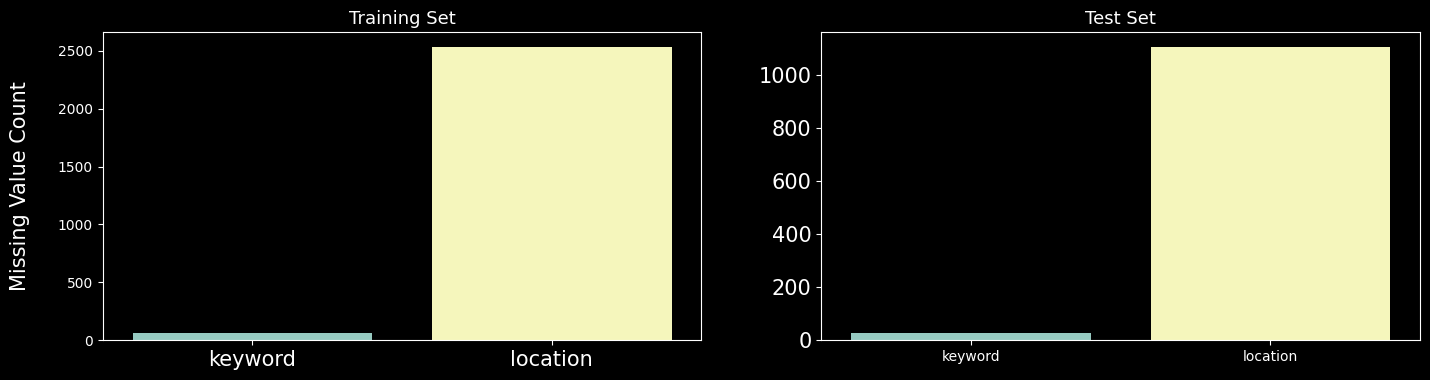

In [199]:
nan_values = ["keyword", "location"]

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=tweets[nan_values].isnull().sum().index, y=tweets[nan_values].isnull().sum().values, ax=axes[0])
sns.barplot(x=tweets_test[nan_values].isnull().sum().index, y=tweets_test[nan_values].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

In [200]:
for df in [tweets, tweets_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no{col}')


In [201]:
tweets.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

In [202]:
tweets_test.isna().sum()

keyword     0
location    0
text        0
dtype: int64

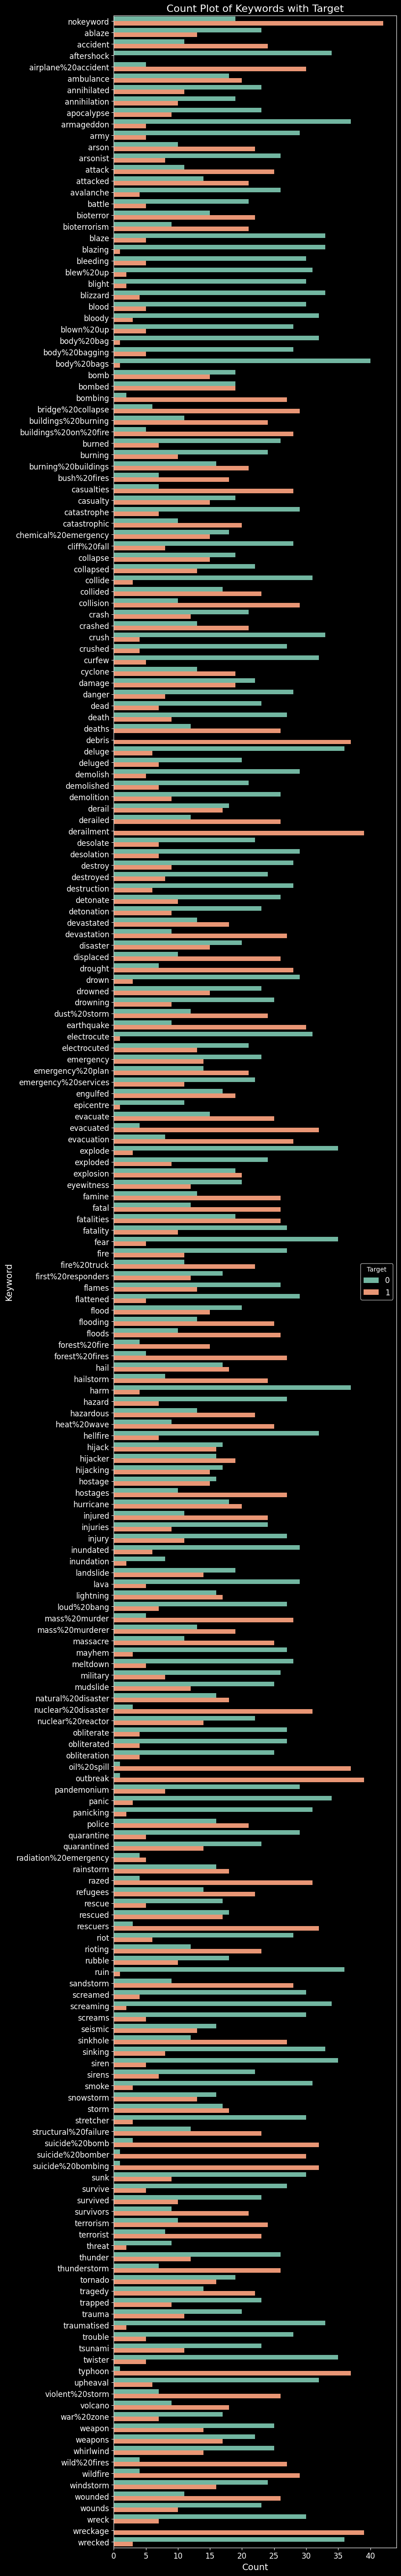

In [203]:
# count plot along y axis
fig = plt.figure(figsize=(8, 72), dpi=100)
sns.countplot(y ='keyword', hue = "target", data = tweets,palette = "Set2")

# Add title and labels
plt.title('Count Plot of Keywords with Target', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Target', fontsize=12)

# Show the plot
plt.show()


In [204]:
# word_count
tweets['word_count'] = tweets['text'].apply(lambda x: len(str(x).split()))
tweets_test['word_count'] = tweets_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
tweets['unique_word_count'] = tweets['text'].apply(lambda x: len(set(str(x).split())))
tweets_test['unique_word_count'] = tweets_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
tweets['stop_word_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
tweets_test['stop_word_count'] = tweets_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
tweets['url_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
tweets_test['url_count'] = tweets_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
tweets['mean_word_length'] = tweets['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
tweets_test['mean_word_length'] = tweets_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
tweets['char_count'] = tweets['text'].apply(lambda x: len(str(x)))
tweets_test['char_count'] = tweets_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
tweets['punctuation_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
tweets_test['punctuation_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
tweets['hashtag_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
tweets_test['hashtag_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
tweets['mention_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
tweets_test['mention_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

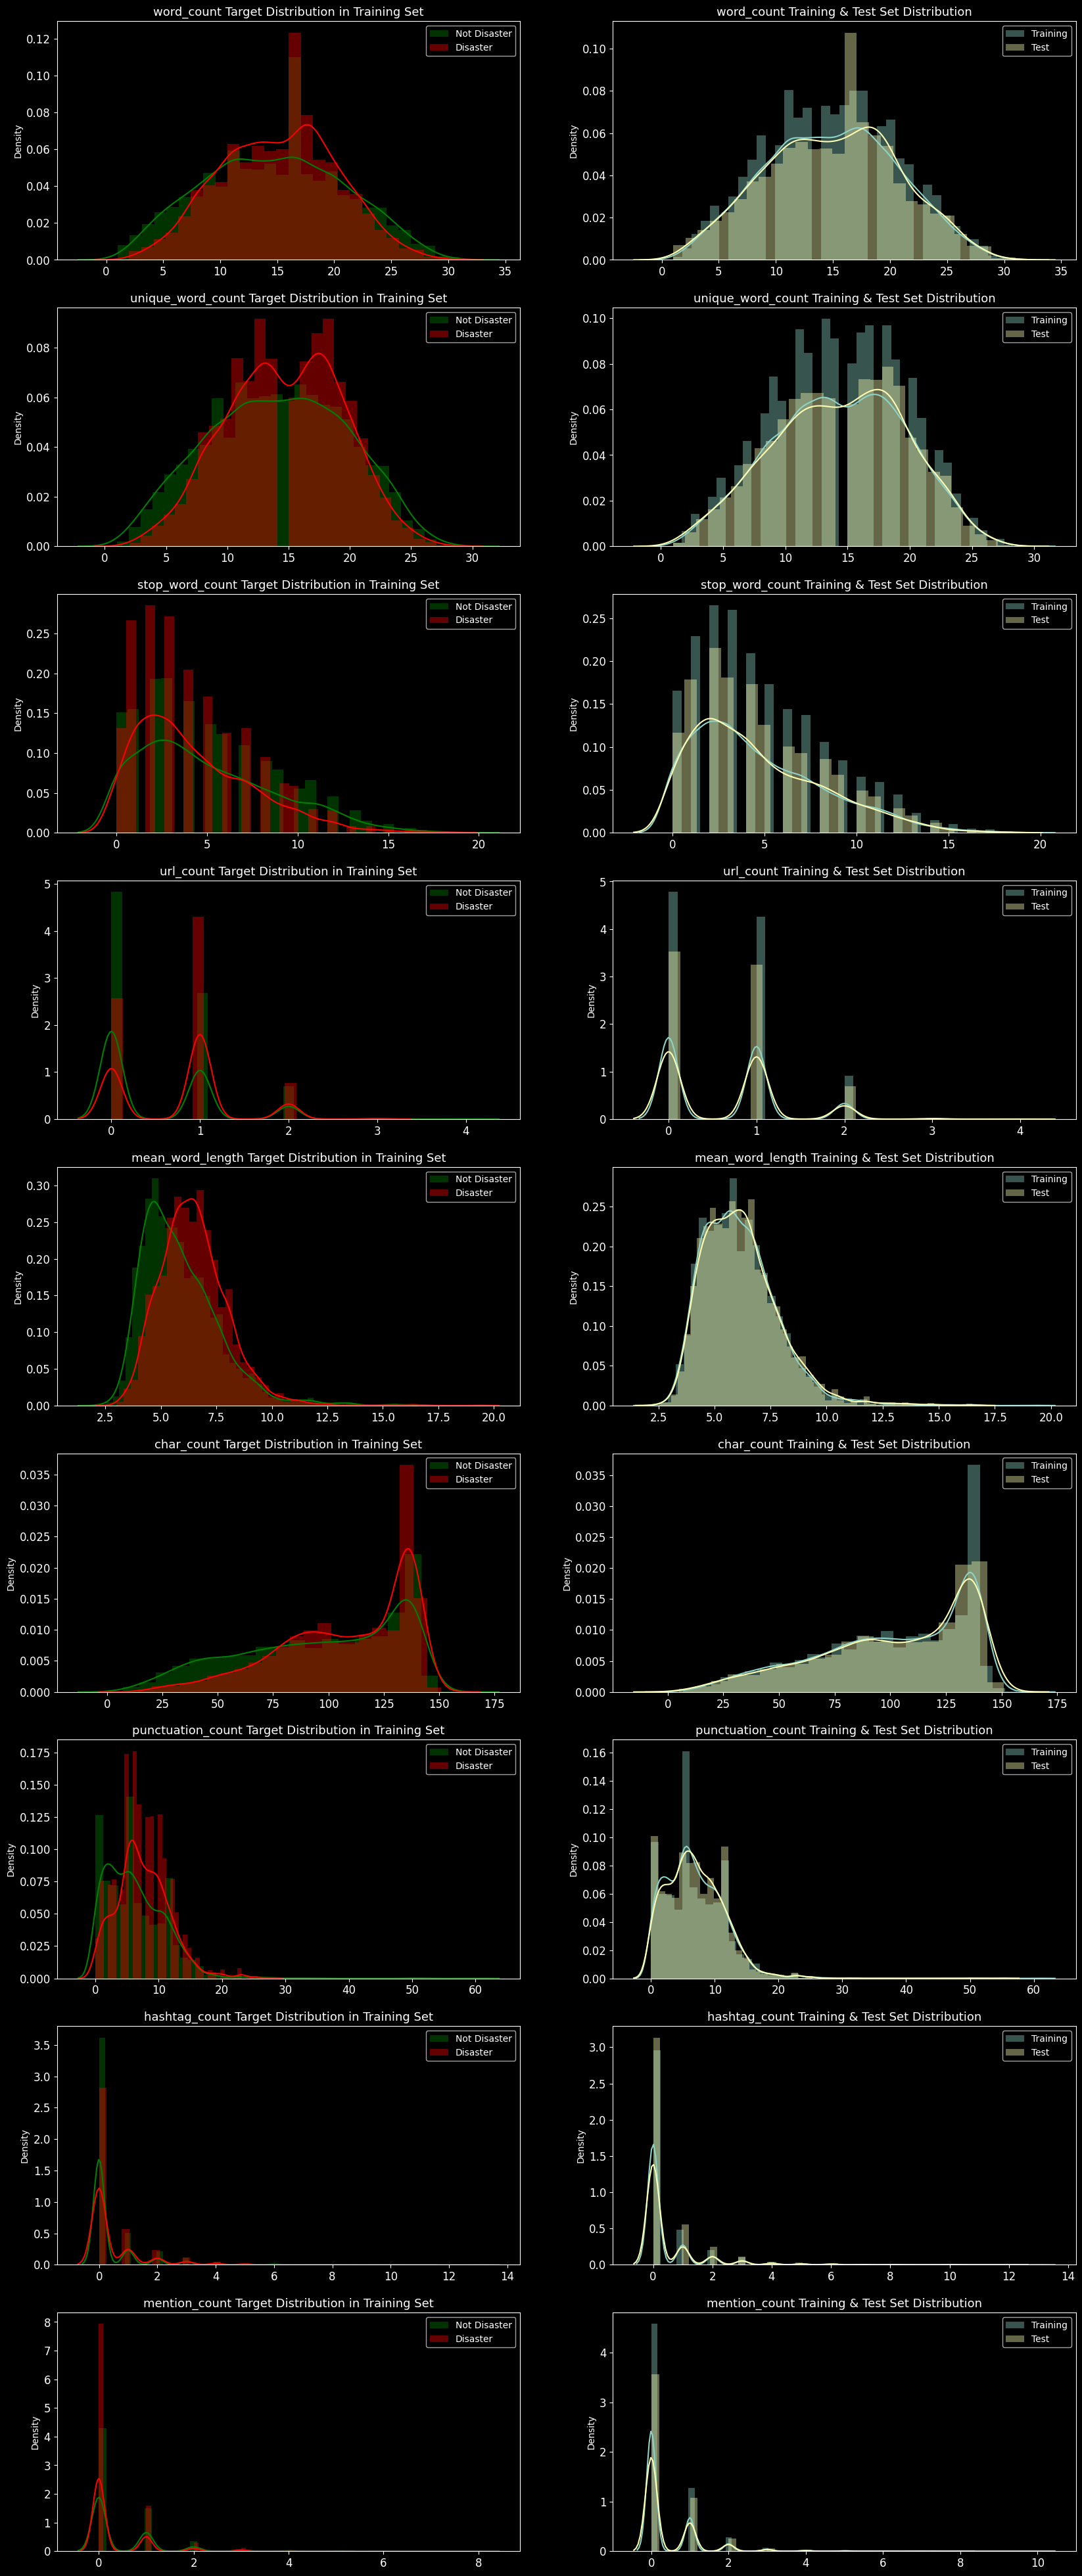

In [205]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = tweets['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(tweets.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(tweets.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(tweets[feature], label='Training', ax=axes[i][1])
    sns.distplot(tweets_test[feature], label='Test', ax=axes[i][1])

    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()

    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [206]:
x=tweets.target.value_counts()

In [207]:
x

target
0    4342
1    3271
Name: count, dtype: int64

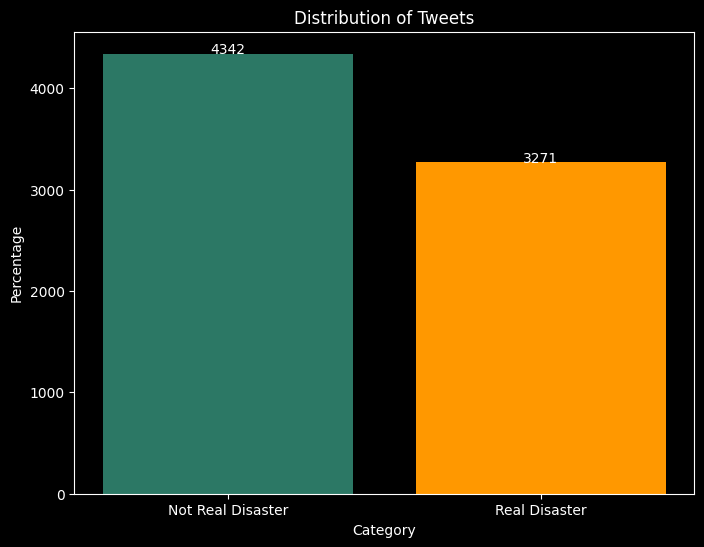

In [208]:
x_lab = ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(x_lab, x, color=colors)

# Add data labels
for i, v in enumerate(x):
    plt.text(i, v + 1, str(v), ha='center')

# Add title and labels
plt.title("Distribution of Tweets")
plt.xlabel("Category")
plt.ylabel("Percentage")

# Show the plot
plt.show()


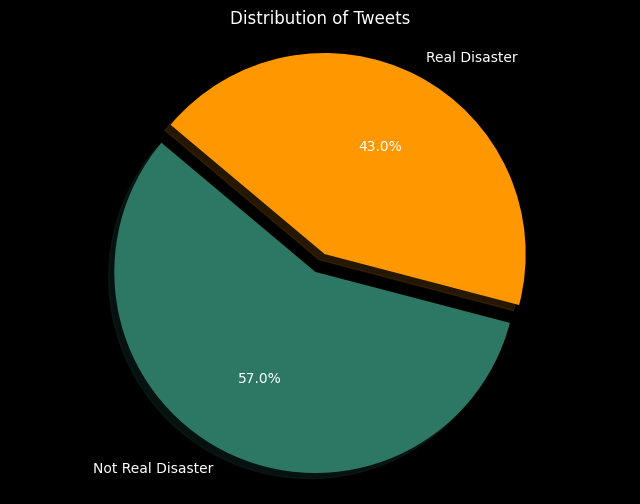

In [209]:
labels = ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Explode the Real Disaster slice
explode = (0.1, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(x, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title("Distribution of Tweets")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

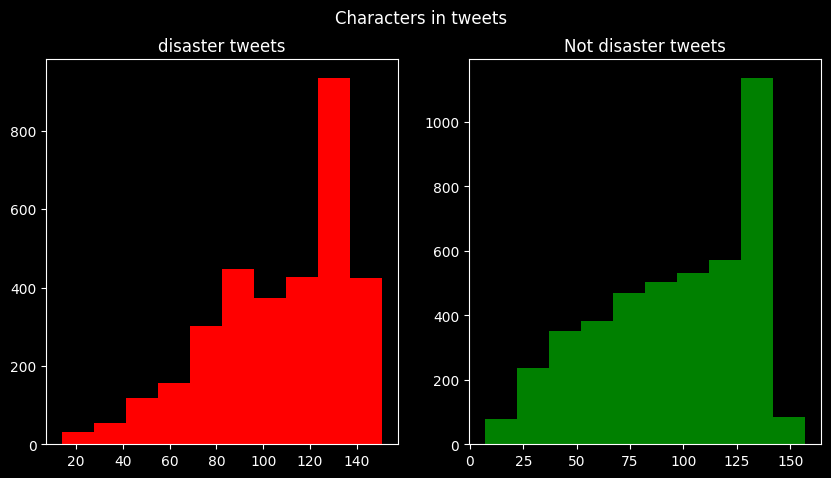

In [210]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweets[tweets['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweets[tweets['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

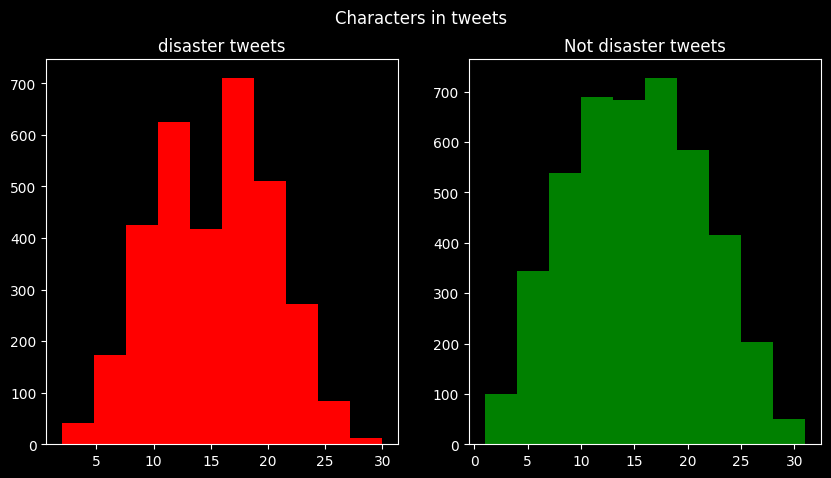

In [211]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweets[tweets['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweets[tweets['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [212]:
def gram(text,n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [213]:
N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        disaster_unigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

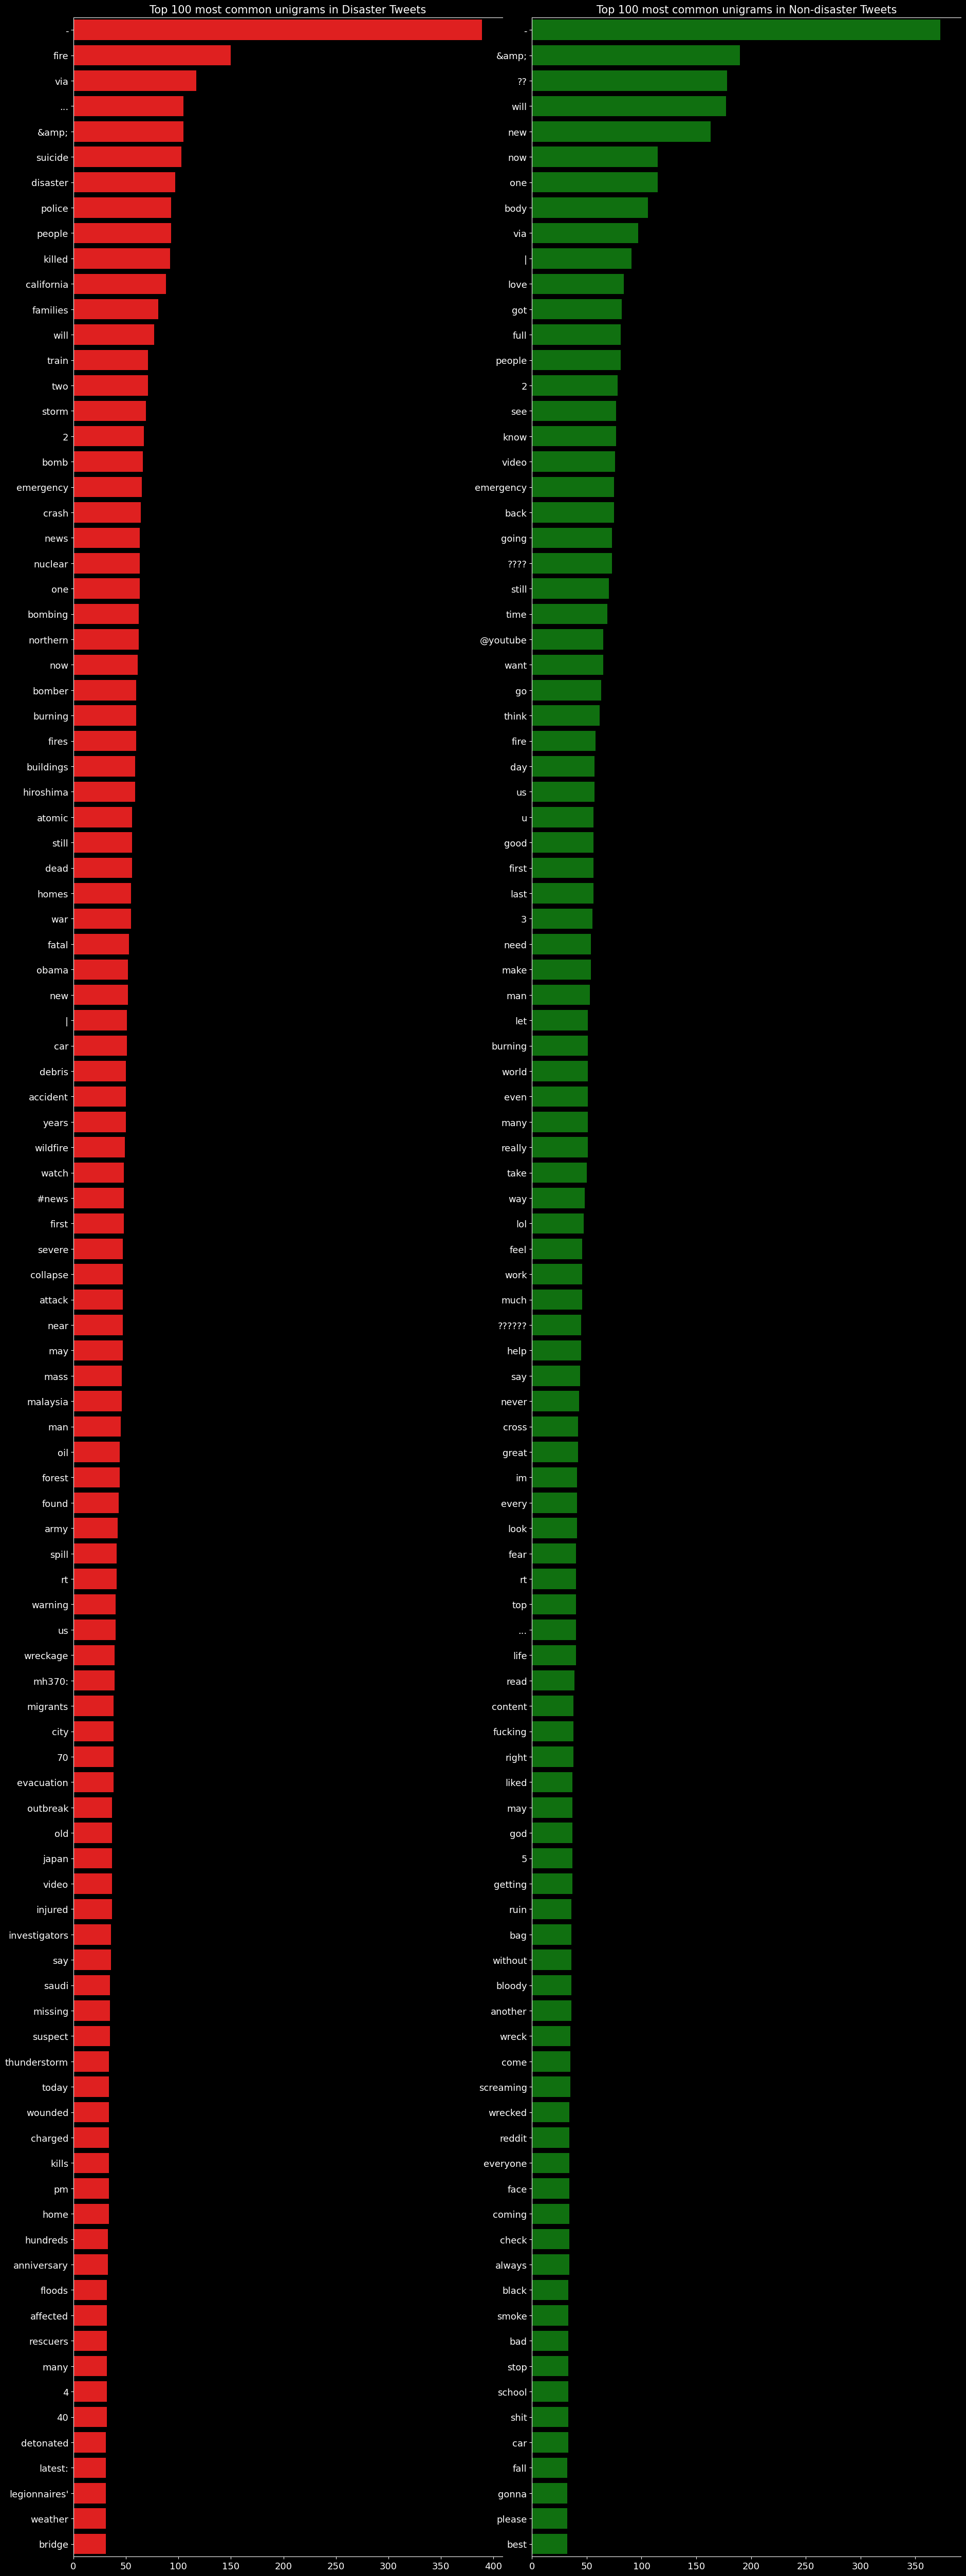

In [214]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [215]:
# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

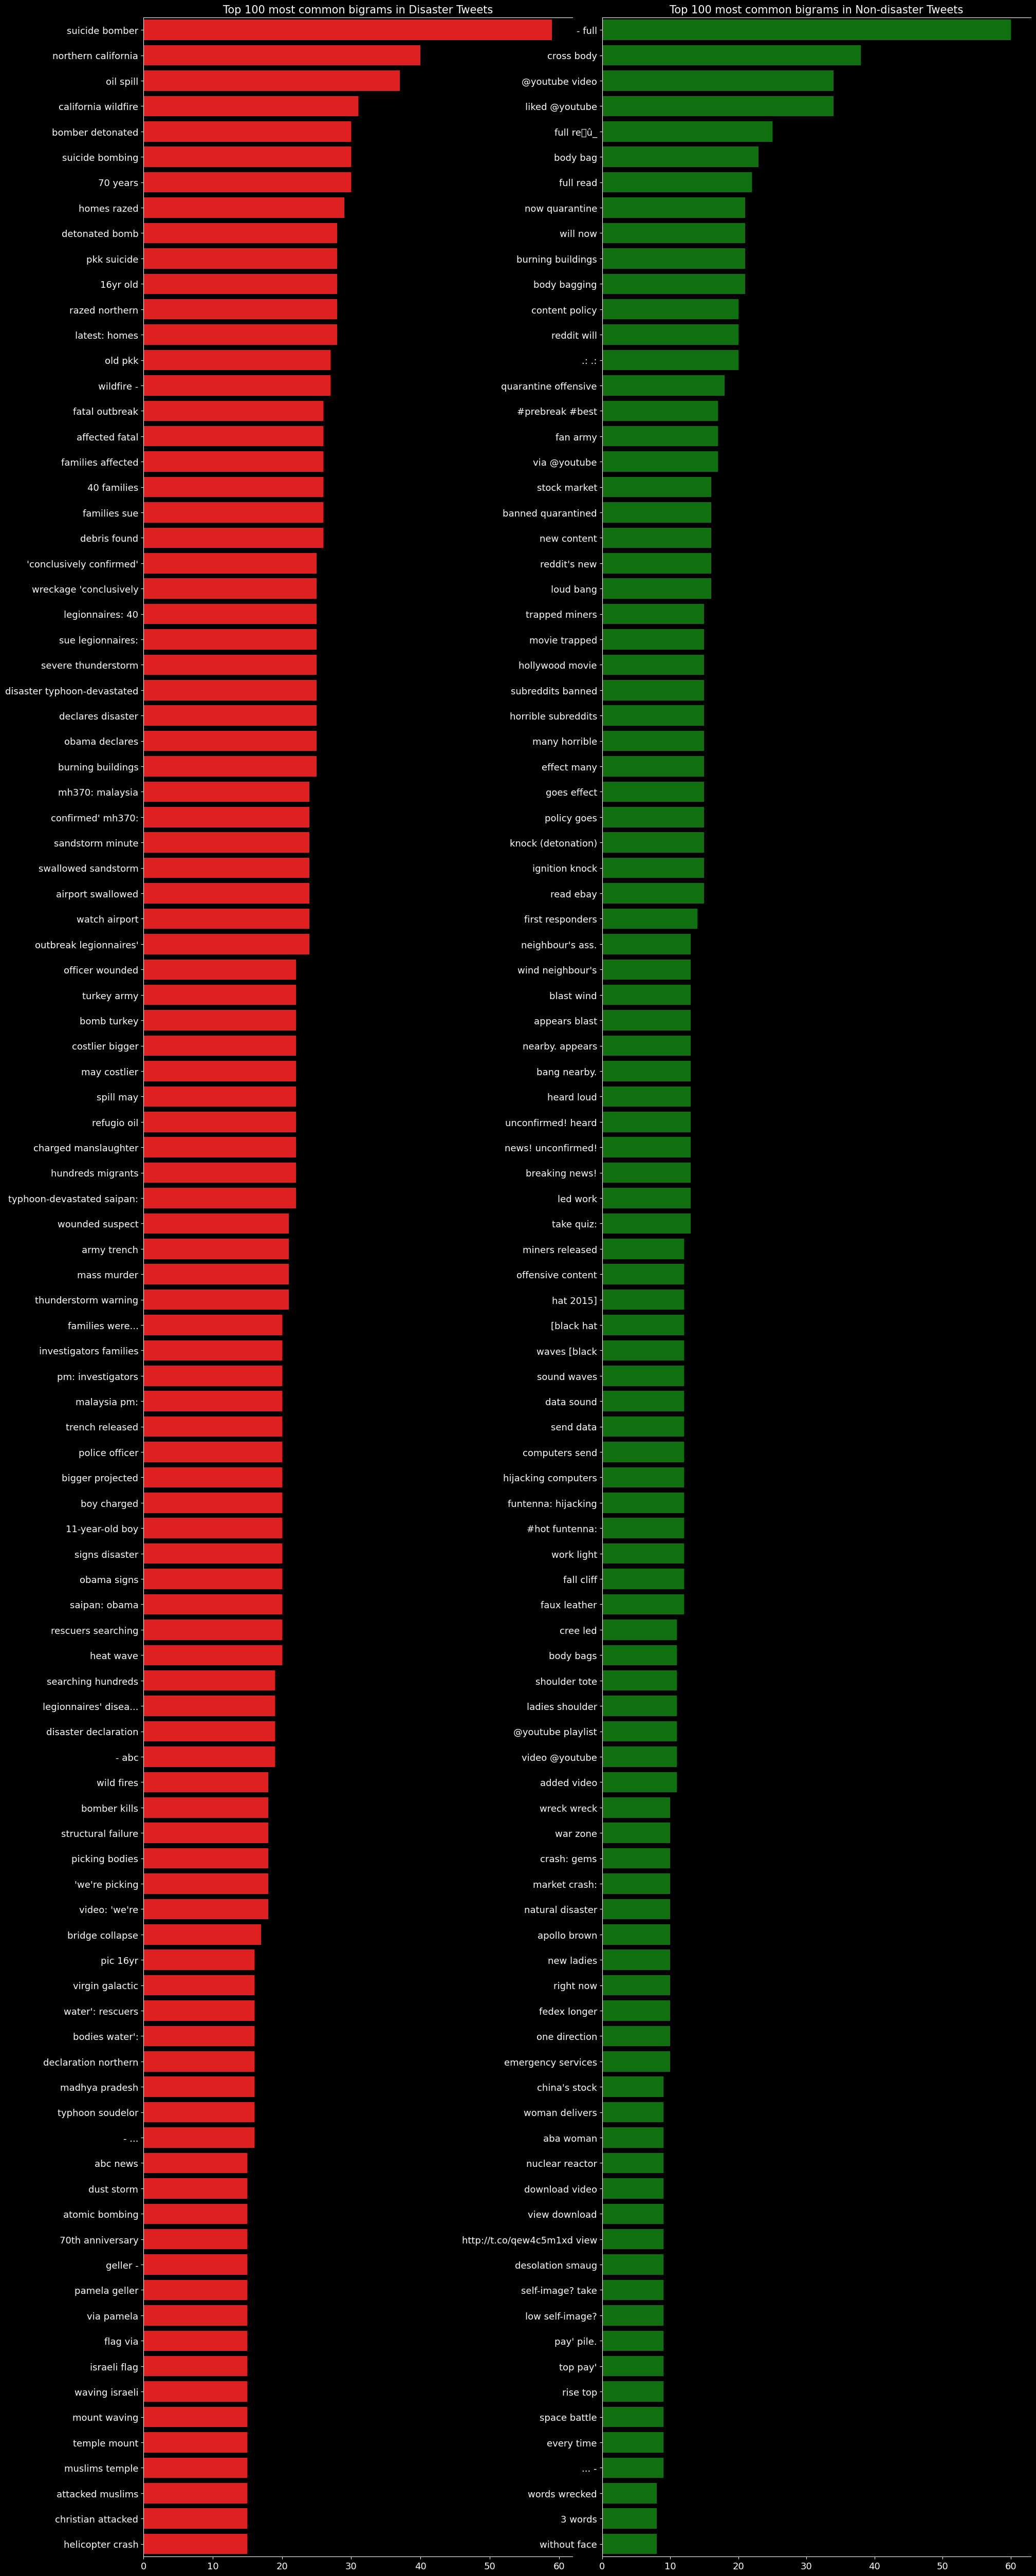

In [216]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [217]:
# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

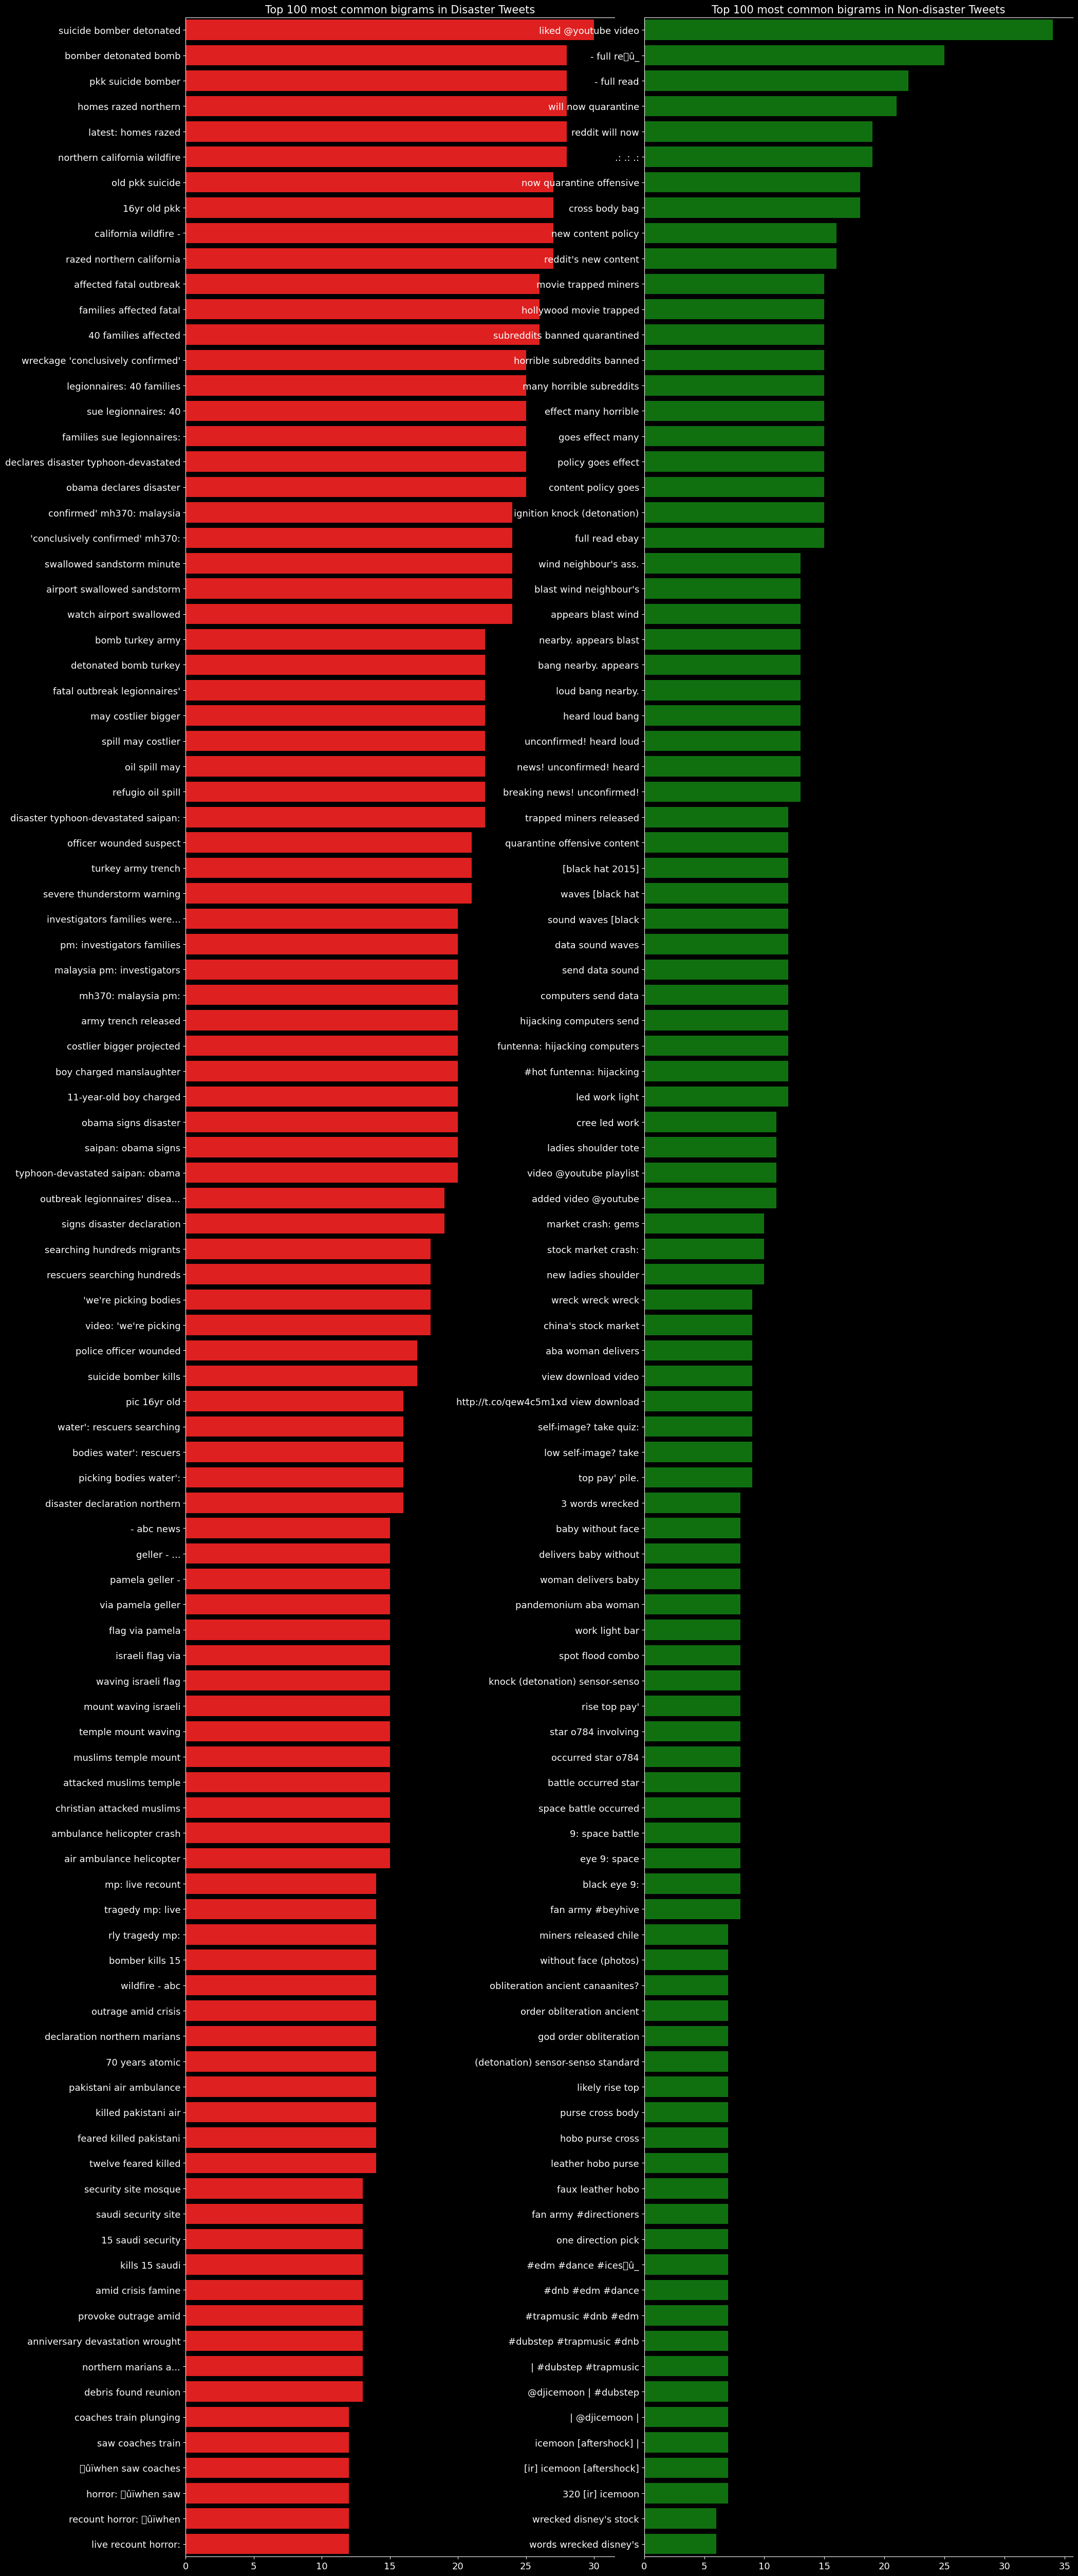

In [218]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [237]:
tweets['complete_text'] = tweets['keyword'] + ' ' + tweets['location'] + ' ' + tweets['text']
tweets_test['complete_text'] = tweets_test['keyword'] + ' ' + tweets_test['location'] + ' ' + tweets_test['text']

In [238]:
def data_clean(tweet):
    tweet = re.sub(r'https?://\S+|www\.\S+',"",tweet)
    tweet = re.sub(r'<.*?>',"",tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    tweet = tweet.replace("%20", "_")
    tweet = re.sub(r"@[^\s]+[\s]?", "", tweet)
    table=str.maketrans('','',string.punctuation)
    tweet =  tweet.translate(table)

    return tweet



tweets['complete_text_cleaned'] = tweets['complete_text'].apply(lambda s : data_clean(s))
tweets_test['complete_text_cleaned'] = tweets_test['complete_text'].apply(lambda s : data_clean(s))

In [239]:
tweets.head(3)

,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,complete_text,complete_text_cleaned
0,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,1,0,nokeyword nolocation Our Deeds are the Reason ...,nokeyword nolocation Our Deeds are the Reason ...
1,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,0,0,nokeyword nolocation Forest fire near La Ronge...,nokeyword nolocation Forest fire near La Ronge...
2,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,3,0,0,nokeyword nolocation All residents asked to 's...,nokeyword nolocation All residents asked to sh...


In [240]:
tweets_test.head(3)

,keyword,location,text,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,complete_text,complete_text_cleaned
0,nokeyword,nolocation,Just happened a terrible car crash,6,6,2,0,4.833333,34,0,0,0,nokeyword nolocation Just happened a terrible ...,nokeyword nolocation Just happened a terrible ...
1,nokeyword,nolocation,"Heard about #earthquake is different cities, s...",9,9,2,0,6.222222,64,3,1,0,nokeyword nolocation Heard about #earthquake i...,nokeyword nolocation Heard about earthquake is...
2,nokeyword,nolocation,"there is a forest fire at spot pond, geese are...",19,19,10,0,4.105263,96,2,0,0,nokeyword nolocation there is a forest fire at...,nokeyword nolocation there is a forest fire at...


In [241]:
x_train = tweets[["complete_text_cleaned"]]
x_test = tweets_test[["complete_text_cleaned"]]

In [242]:
x_train

,complete_text_cleaned
0,nokeyword nolocation Our Deeds are the Reason ...
1,nokeyword nolocation Forest fire near La Ronge...
2,nokeyword nolocation All residents asked to sh...
3,nokeyword nolocation 13000 people receive wild...
4,nokeyword nolocation Just got sent this photo ...
...,...
7608,nokeyword nolocation Two giant cranes holding ...
7609,nokeyword nolocation The out of control wild f...
7610,nokeyword nolocation M194 0104 UTC5km S of Vol...
7611,nokeyword nolocation Police investigating afte...


In [243]:
x_test.head()

,complete_text_cleaned
0,nokeyword nolocation Just happened a terrible ...
1,nokeyword nolocation Heard about earthquake is...
2,nokeyword nolocation there is a forest fire at...
3,nokeyword nolocation Apocalypse lighting Spoka...
4,nokeyword nolocation Typhoon Soudelor kills 28...


In [245]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

In [246]:
x_train['complete_text_cleaned'] = x_train['complete_text_cleaned'].apply(lambda x: remove_stopwords(x))
x_test['complete_text_cleaned'] = x_test['complete_text_cleaned'].apply(lambda x: remove_stopwords(x))

In [247]:
x_train['complete_text_cleaned'].head()

0    nokeyword nolocation Our Deeds Reason earthqua...
1    nokeyword nolocation Forest fire near La Ronge...
2    nokeyword nolocation All residents asked shelt...
3    nokeyword nolocation 13000 people receive wild...
4    nokeyword nolocation Just got sent photo Ruby ...
Name: complete_text_cleaned, dtype: object

In [248]:
x_test['complete_text_cleaned'].head()

0    nokeyword nolocation Just happened terrible ca...
1    nokeyword nolocation Heard earthquake differen...
2    nokeyword nolocation forest fire spot pond gee...
3    nokeyword nolocation Apocalypse lighting Spoka...
4    nokeyword nolocation Typhoon Soudelor kills 28...
Name: complete_text_cleaned, dtype: object

In [249]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 Applies lemmatization using the lemmatizer.lemmatize() function, which reduces the word to its base or dictionary form (i.e., lemma)

In [250]:
tokenizer = TweetTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def tokenize_and_lemmatize(tweet):
    tweet = tweet.lower()
    tokens = tokenizer.tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [167]:
s = 'The gensim. utils. simple_preprocess() is a utili function provided ruined by changing changed Gensim for preprocessing text data.'
s = data_clean(s)
print(s)
s = remove_stopwords(s)
print(s)

The gensim utils simplepreprocess is a utili function provided ruined by changing changed Gensim for preprocessing text data
The gensim utils simplepreprocess utili function provided ruined changing changed Gensim preprocessing text data


In [168]:
print(tokenize_and_lemmatize(s))

['the', 'gensim', 'utils', 'simplepreprocess', 'utili', 'function', 'provided', 'ruined', 'changing', 'changed', 'gensim', 'preprocessing', 'text', 'data']


In [253]:
x_train['complete_text_cleaned'] = x_train['complete_text_cleaned'].apply(lambda x: tokenize_and_lemmatize(x))
x_test['complete_text_cleaned'] = x_test['complete_text_cleaned'].apply(lambda x: tokenize_and_lemmatize(x))

In [254]:
x_train['complete_text_cleaned'].head()

0    [nokeyword, nolocation, our, deed, reason, ear...
1    [nokeyword, nolocation, forest, fire, near, la...
2    [nokeyword, nolocation, all, resident, asked, ...
3    [nokeyword, nolocation, 13000, people, receive...
4    [nokeyword, nolocation, just, got, sent, photo...
Name: complete_text_cleaned, dtype: object

In [255]:
x_test['complete_text_cleaned'].head()

0    [nokeyword, nolocation, just, happened, terrib...
1    [nokeyword, nolocation, heard, earthquake, dif...
2    [nokeyword, nolocation, forest, fire, spot, po...
3    [nokeyword, nolocation, apocalypse, lighting, ...
4    [nokeyword, nolocation, typhoon, soudelor, kil...
Name: complete_text_cleaned, dtype: object

In [264]:
def df_to_list(df,is_training = True):
    if is_training:
        x_train_list = []
        for lst in df['complete_text_cleaned']:
             x_train_list.append(lst)
        return x_train_list
    else:
        x_test_list = []
        for lst in df['complete_text_cleaned']:
             x_test_list.append(lst)
        return x_test_list

In [265]:
x_train_list = df_to_list(x_train)
x_test_list = df_to_list(x_test,is_training = False)

In [301]:
# Train Word2Vec model

embed_size = 256
window_size = 5
min_count = 3
workers = 6
model = Word2Vec(vector_size=embed_size, window=window_size, min_count=min_count, workers=workers)

In [302]:
model.build_vocab(x_train_list)

In [303]:
model.train(x_train_list, total_examples=model.corpus_count, epochs=model.epochs)

(392242, 483660)

In [304]:
# Getting weights of the most similar words to the word 'harry'
model.wv.most_similar('nolocation')

[('2', 0.9997795820236206),
 ('love', 0.9997444152832031),
 ('come', 0.9997317790985107),
 ('youre', 0.9997252821922302),
 ('london', 0.9997243285179138),
 ('got', 0.9997193813323975),
 ('one', 0.9997182488441467),
 ('injury', 0.9997178912162781),
 ('look', 0.9997131824493408),
 ('the', 0.9997106790542603)]

In [306]:
# Save the trained model if needed
model.save("word2vec_model")

Handle OOV

In [365]:
# Load pre-trained Word2Vec model
pretrained_model_path = "word2vec_model"
model = Word2Vec.load(pretrained_model_path)

In [311]:
def get_embedding(word, model):
    try:
        # Try to get embedding for the word directly
        return model.wv[word]
    except KeyError:
        # If word is OOV, return None
        return None


In [312]:
# Example usage:
word = "nolocatio"
embedding = get_embedding(word, model)

if embedding is not None:
    print(f"Embedding for '{word}': {embedding}")
else:
    print(f"No embedding found for '{word}'.")

No embedding found for 'nolocatio'.


In [320]:
count = 0
total_count = 0
for i in range(len(x_test_list)):
	total_count = total_count+len(x_test_list[i])
	for j in range(len(x_test_list[i])):
		embedding = get_embedding(x_test_list[i][j], model)
		if embedding is None:
			count+=1

print("Number of sentences that could not be embedded: ", count)
print("Total number of sentences to embed: ", total_count)
print("Percentage of sentences that could not be embedded: ", count/total_count*100)


Number of sentences that could not be embedded:  7225
Total number of sentences to embed:  41660
Percentage of sentences that could not be embedded:  17.342774843975036


In [318]:
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

vocab_list = flatten_list(x_train_list)

In [319]:
len(vocab_list)

96732

In [321]:
vocab_list = list(set(vocab_list))

len(vocab_list)

16229

In [400]:
def oov(sent_list):
    valid_x_test_list = []
    for sublist in x_test_list:
        valid_words = []
        for word in sublist:
            embedding = get_embedding(word, model)
            if embedding is not None:
                valid_words.append(word)
        if valid_words:
            valid_x_test_list.append(valid_words)

    data = [{'index': i, 'nested_list': lst} for i, lst in enumerate(valid_x_test_list)]
    df = pd.DataFrame(data)
    df.rename(columns={'nested_list': 'complete_text_cleaned'}, inplace=True)
    df.drop(columns=['index'], inplace=True)
    return df




In [406]:
x_test = oov(x_test)

,complete_text_cleaned
0,"[nokeyword, nolocation, just, happened, terrib..."
1,"[nokeyword, nolocation, heard, earthquake, dif..."
2,"[nokeyword, nolocation, forest, fire, spot, po..."
3,"[nokeyword, nolocation, apocalypse, lighting, ..."
4,"[nokeyword, nolocation, typhoon, soudelor, kil..."


In [399]:
df.head()

,index,complete_text_cleaned
0,0,"[nokeyword, nolocation, just, happened, terrib..."
1,1,"[nokeyword, nolocation, heard, earthquake, dif..."
2,2,"[nokeyword, nolocation, forest, fire, spot, po..."
3,3,"[nokeyword, nolocation, apocalypse, lighting, ..."
4,4,"[nokeyword, nolocation, typhoon, soudelor, kil..."


In [395]:
valid_x_test_list[:2]

[['nokeyword', 'nolocation', 'just', 'happened', 'terrible', 'car', 'crash'],
 ['nokeyword',
  'nolocation',
  'heard',
  'earthquake',
  'different',
  'city',
  'stay',
  'safe',
  'everyone']]

In [372]:
x_train

,complete_text_cleaned
0,"[nokeyword, nolocation, our, deed, reason, ear..."
1,"[nokeyword, nolocation, forest, fire, near, la..."
2,"[nokeyword, nolocation, all, resident, asked, ..."
3,"[nokeyword, nolocation, 13000, people, receive..."
4,"[nokeyword, nolocation, just, got, sent, photo..."
...,...
7608,"[nokeyword, nolocation, two, giant, crane, hol..."
7609,"[nokeyword, nolocation, the, control, wild, fi..."
7610,"[nokeyword, nolocation, m194, 0104, utc, 5km, ..."
7611,"[nokeyword, nolocation, police, investigating,..."


In [448]:
model_vec = Word2Vec.load(pretrained_model_path)
model_vec.wv.key_to_index

{'nolocation': 0,
 'i': 1,
 '\x89': 2,
 'the': 3,
 'û': 4,
 'new': 5,
 'fire': 6,
 'a': 7,
 'im': 8,
 'amp': 9,
 'usa': 10,
 'u': 11,
 'will': 12,
 'in': 13,
 'via': 14,
 'now': 15,
 'one': 16,
 'california': 17,
 'news': 18,
 'people': 19,
 'emergency': 20,
 'dont': 21,
 'disaster': 22,
 'death': 23,
 '2': 24,
 'flood': 25,
 'it': 26,
 'police': 27,
 'time': 28,
 'video': 29,
 'weapon': 30,
 'ca': 31,
 'world': 32,
 'storm': 33,
 'crash': 34,
 'york': 35,
 'bomb': 36,
 'burning': 37,
 'fatality': 38,
 'injury': 39,
 'state': 40,
 'body': 41,
 'year': 42,
 'city': 43,
 'home': 44,
 'wildfire': 45,
 'you': 46,
 'attack': 47,
 'building': 48,
 'my': 49,
 'hostage': 50,
 'day': 51,
 'to': 52,
 'family': 53,
 'accident': 54,
 'this': 55,
 'life': 56,
 'go': 57,
 'still': 58,
 'casualty': 59,
 'say': 60,
 'london': 61,
 'dead': 62,
 'back': 63,
 'siren': 64,
 'know': 65,
 'is': 66,
 'look': 67,
 'suicide': 68,
 'uk': 69,
 'train': 70,
 'got': 71,
 'united': 72,
 'see': 73,
 'collapse': 74,


In [369]:
def sent_vec(sent, model):
	vector_size = model.wv.vector_size
	wv_res = np.zeros(vector_size)
	wcount = 1
	for word in sent:
		if word in model.wv.key_to_index:
			wv_res += model.wv[word]
			wcount += 1
	wv_res = wv_res/wcount
	return wv_res

In [370]:
sen = [['hello', 'world'], ['world', 'hello']]
averaged_embeddings = [sent_vec(sentence, model) for sentence in sen]

In [375]:
x_train['embeding'] = [sent_vec(sentence, model) for sentence in x_train['complete_text_cleaned']]

In [408]:
x_test['embeding'] = [sent_vec(sentence, model) for sentence in x_test['complete_text_cleaned']]

In [410]:
x_train.head()

,complete_text_cleaned,embeding
0,"[nokeyword, nolocation, our, deed, reason, ear...","[0.03701668243027396, -0.12331592167417209, 0...."
1,"[nokeyword, nolocation, forest, fire, near, la...","[0.04400793625973165, -0.14894159510731697, 0...."
2,"[nokeyword, nolocation, all, resident, asked, ...","[0.026601975535353026, -0.09337566991647085, 0..."
3,"[nokeyword, nolocation, 13000, people, receive...","[0.0393468892822663, -0.14008983224630356, 0.1..."
4,"[nokeyword, nolocation, just, got, sent, photo...","[0.03577725834805857, -0.12252367389473048, 0...."


In [411]:
x_test.head()

,complete_text_cleaned,embeding
0,"[nokeyword, nolocation, just, happened, terrib...","[0.0356556088081561, -0.11839092546142638, 0.1..."
1,"[nokeyword, nolocation, heard, earthquake, dif...","[0.032577420119196177, -0.11046397276222705, 0..."
2,"[nokeyword, nolocation, forest, fire, spot, po...","[0.03625737778334455, -0.1179010287265886, 0.1..."
3,"[nokeyword, nolocation, apocalypse, lighting, ...","[0.026934227706598386, -0.08962347757603441, 0..."
4,"[nokeyword, nolocation, typhoon, soudelor, kil...","[0.030388912186026573, -0.11090885661542416, 0..."


In [435]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train_train, X_test, y_train, y_test = train_test_split(x_train['embeding'].tolist(), tweets_target.tolist(), test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6900853578463558


In [ ]:
import pickle
with open('xgboost_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [468]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
random_forest_model.fit(X_train_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
with open('randomforest_model.pickle', 'wb') as f:
    pickle.dump(model, f)


Accuracy:  0.7058437294812869


In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_train, y_train)
logreg_predictions = logreg.predict(X_test)
accuracy = accuracy_score(y_test, logreg_predictions)
print("Accuracy: ", accuracy)
with open('logistic_model.pickle', 'wb') as f:
    pickle.dump(model, f)


Accuracy:  0.5843729481286933


In [497]:
# KNN
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(X_train_train, y_train)
knn_predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy: ", accuracy)
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy:  0.6336178594878529


In [489]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_train, y_train)
nb_predictions = nb.predict(X_test)
accuracy = accuracy_score(y_test, nb_predictions)
print("Accuracy: ", accuracy)
with open('nb_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy:  0.5692711753118844


In [485]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=300)
dt.fit(X_train_train, y_train)
dt_predictions = dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy: ", accuracy)
with open('dt_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy:  0.6093237032173342


In [47]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(x_train['text_cleaned_stopwords'])

In [49]:
result.shape

(7613, 17201)

In [51]:
# train set and test set
y_train = tweets["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, y_train, test_size=0.2, random_state=42)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
# Naive Bayes Classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# fitting and predicting
gnb.fit(X_train.toarray(), y_train)
y_pred_gnb = gnb.predict(X_test.toarray())
mnb.fit(X_train.toarray(), y_train)
y_pred_mnb = mnb.predict(X_test.toarray())
bnb.fit(X_train.toarray(), y_train)
y_pred_bnb = bnb.predict(X_test.toarray())
# accuracy scores
print("Gaussian", accuracy_score(y_test, y_pred_gnb))
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli", accuracy_score(y_test, y_pred_bnb))

Gaussian 0.6198292843072882
Multinomial 0.7957977675640184
Bernoulli 0.8010505581089954
